In [3]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [4]:
df= pd.read_csv('Molecular_Clean.csv')

In [5]:
df.head(5)

,Study_ID.,Disease,age,Sex,Habit,Site,SNA1%,SNA1MAX,SNA1MEAN,CD44%>4,CD44N%,CD44N+,CD44max
0,1,1,60,F,Chewing,Buccal_Mucosa,68.0,49.1,17.5,44.155844,11.688312,1,6
1,3,1,46,M,Chewing,Buccal_Mucosa,53.0,7.7,3.6,26.666667,13.333333,1,6
2,4,1,56,F,No_Habits,Tongue,38.0,28.8,6.7,21.739130,10.869565,1,6
3,7,1,64,M,No_Habits,Other,91.0,69.8,30.3,32.173913,24.347826,1,6
4,10,1,60,F,Chewing,Other,12.0,19.3,3.4,12.413793,8.275862,1,6


In [6]:
df.shape

(134, 13)

In [7]:
df.describe().transpose()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [452]:
df.isna().mean()

Study_ID.    0.0
Disease      0.0
age          0.0
Sex          0.0
Habit        0.0
Site         0.0
SNA1%        0.0
SNA1MAX      0.0
SNA1MEAN     0.0
CD44%>4      0.0
CD44N%       0.0
CD44N+       0.0
CD44max      0.0
dtype: float64

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 13 columns):
Study_ID.    134 non-null object
Disease      134 non-null int64
age          134 non-null int64
Sex          134 non-null object
Habit        134 non-null object
Site         134 non-null object
SNA1%        134 non-null float64
SNA1MAX      134 non-null float64
SNA1MEAN     134 non-null float64
CD44%>4      134 non-null float64
CD44N%       134 non-null float64
CD44N+       134 non-null int64
CD44max      134 non-null int64
dtypes: float64(5), int64(4), object(4)
memory usage: 13.7+ KB


In [454]:
df.Disease.value_counts()

1    79
0    55
Name: Disease, dtype: int64

In [455]:
df.columns

Index(['Study_ID.', 'Disease', 'age', 'Sex', 'Habit ', 'Site ', 'SNA1%',
       'SNA1MAX', 'SNA1MEAN', 'CD44%>4 ', 'CD44N%', 'CD44N+', 'CD44max'],
      dtype='object')

In [456]:
df['Habit '].value_counts()

Chewing             78
No_Habits           34
smoking             11
smoking+Chewing     11
Name: Habit , dtype: int64

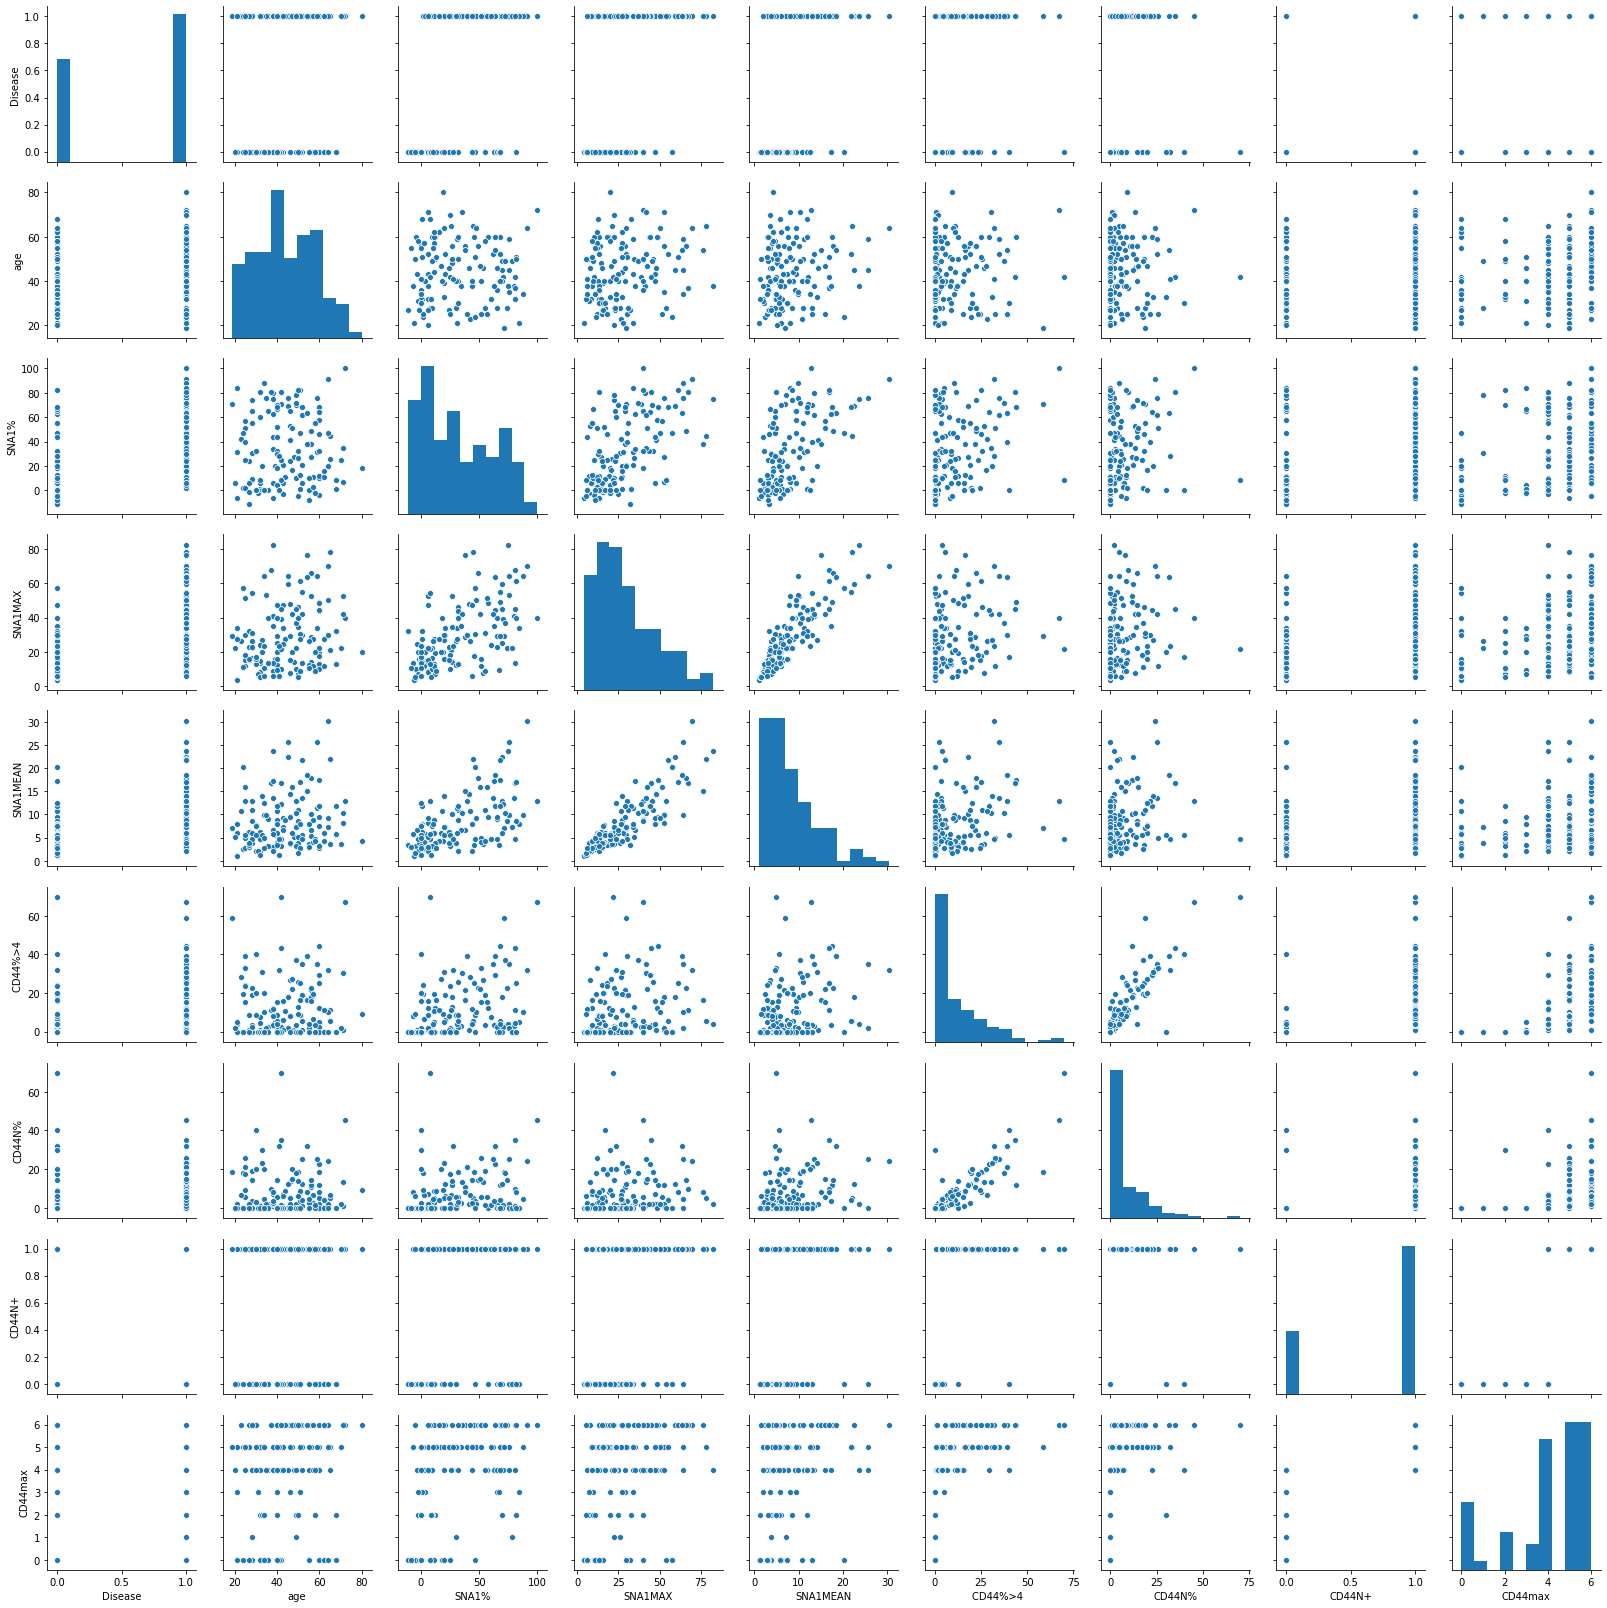

In [21]:
sns.pairplot(df)
plt.show()

In [457]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

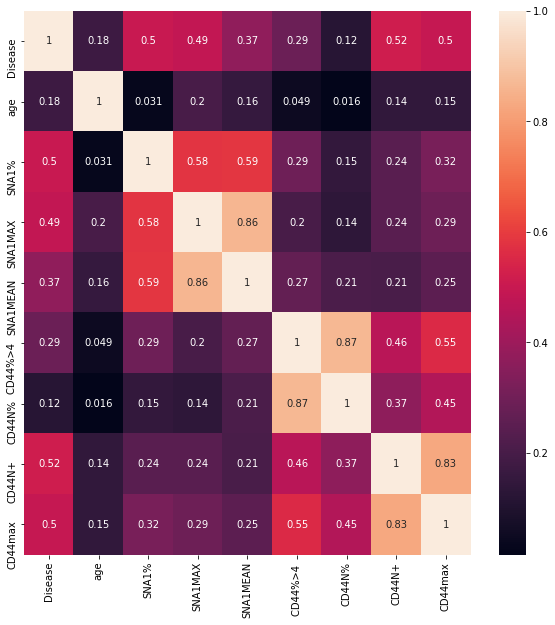

In [458]:
#Check Correlation 
plt.figure(figsize = (10,10))     # Size of the figure
ax= sns.heatmap(df.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

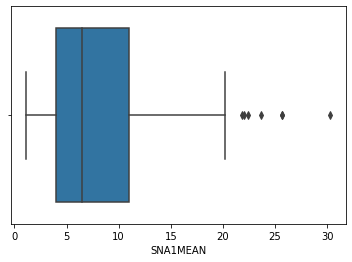

In [459]:
sns.boxplot(df.SNA1MEAN)
plt.show()

In [460]:
def continues_data(i):
    plt.figure(figsize= (6,4))
    ax= sns.boxplot(y= i, data =df, x ='Disease')
    ##ax.set_yscale('log')
    ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
    plt.show

In [461]:
df.columns

Index(['Study_ID.', 'Disease', 'age', 'Sex', 'Habit ', 'Site ', 'SNA1%',
       'SNA1MAX', 'SNA1MEAN', 'CD44%>4 ', 'CD44N%', 'CD44N+', 'CD44max'],
      dtype='object')

In [462]:
cont= ['SNA1%','SNA1MAX', 'SNA1MEAN', 'CD44%>4 ', 'CD44N%', 'CD44N+', 'CD44max']

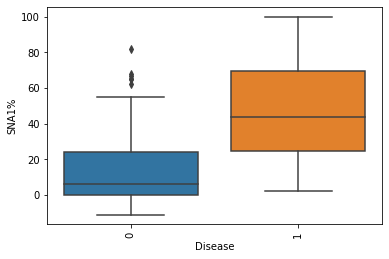

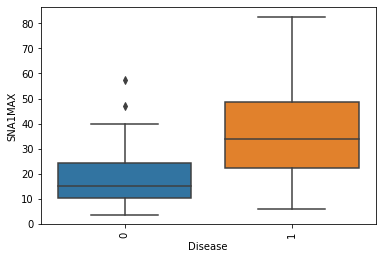

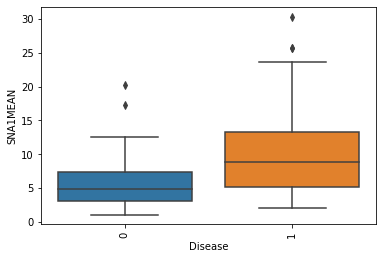

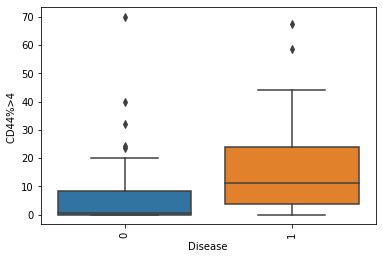

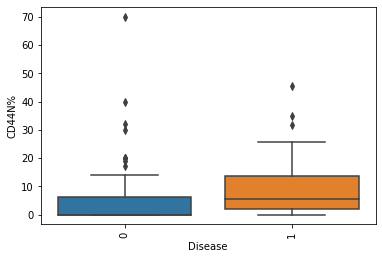

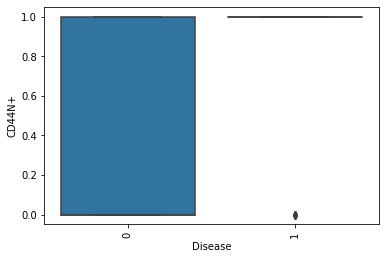

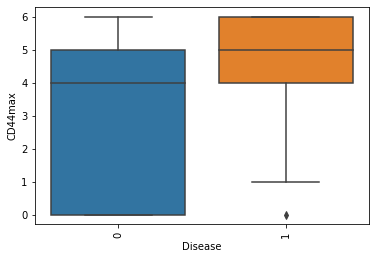

In [463]:
for i in (cont):
    continues_data(i)

In [464]:
df.columns

Index(['Study_ID.', 'Disease', 'age', 'Sex', 'Habit ', 'Site ', 'SNA1%',
       'SNA1MAX', 'SNA1MEAN', 'CD44%>4 ', 'CD44N%', 'CD44N+', 'CD44max'],
      dtype='object')

In [465]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [466]:
#cap outliers in the numeric columns
df[cont] = df[cont].apply(cap_outliers, axis=0)

In [467]:
#Churn data into another column 
X= df.drop(["Disease",'Study_ID.'], axis =1)
y= df.Disease

In [468]:
X

,age,Sex,Habit,Site,SNA1%,SNA1MAX,SNA1MEAN,CD44%>4,CD44N%,CD44N+,CD44max
0,60,F,Chewing,Buccal_Mucosa,68.0,49.10,17.500000,44.155844,11.688312,1,6
1,46,M,Chewing,Buccal_Mucosa,53.0,7.70,3.600000,26.666667,13.333333,1,6
2,56,F,No_Habits,Tongue,38.0,28.80,6.700000,21.739130,10.869565,1,6
3,64,M,No_Habits,Other,91.0,69.80,25.747966,32.173913,24.347826,1,6
4,60,F,Chewing,Other,12.0,19.30,3.400000,12.413793,8.275862,1,6
...,...,...,...,...,...,...,...,...,...,...,...
129,33,M,smoking,Buccal_Mucosa,0.0,19.66,5.610000,0.000000,30.000000,0,2
130,36,M,No_Habits,Buccal_Mucosa,0.0,13.25,3.180000,0.000000,0.000000,0,0
131,34,M,No_Habits,Buccal_Mucosa,0.0,6.07,2.820000,0.000000,0.000000,0,0
132,34,M,No_Habits,Buccal_Mucosa,0.0,10.49,4.950000,0.000000,0.000000,0,2


In [469]:
dummy = pd.get_dummies(X[['Sex','Habit ','Site ']], drop_first =True)
X= pd.concat([X,dummy], axis =1)

In [470]:
X.shape

(134, 17)

In [471]:
X=X.drop(['Sex','Habit ','Site '], axis =1)

In [472]:
X.shape

(134, 14)

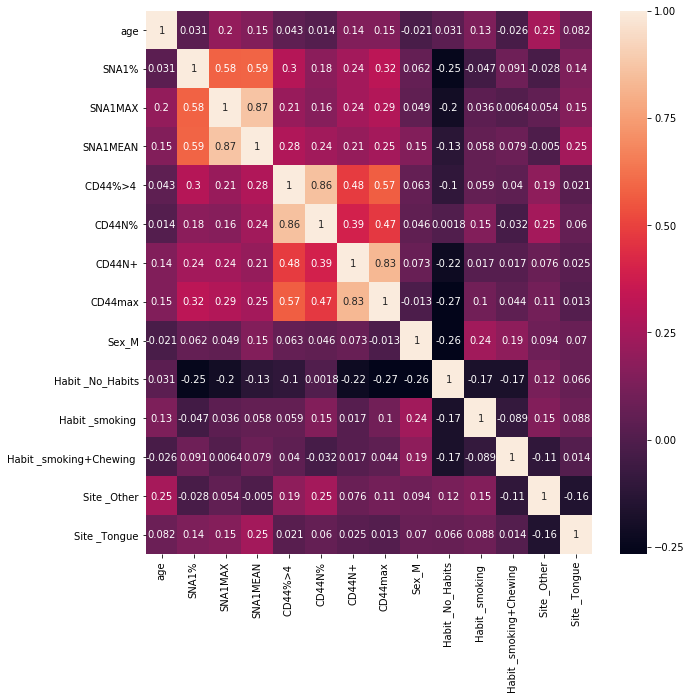

In [473]:
#Check Correlation 
plt.figure(figsize = (10,10))     # Size of the figure
ax= sns.heatmap(X.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [474]:
col= X.columns

In [475]:
#Train_test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.30, random_state =100, stratify =y)

In [476]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(93, 14)
(93,)
(41, 14)
(41,)


# PCA = Dimension reduction

In [477]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()

In [478]:
X_train[col]= scaler.fit_transform(X_train[col])
X_test[col]= scaler.transform(X_test[col])

In [479]:
X_train.head(5)

,age,SNA1%,SNA1MAX,SNA1MEAN,CD44%>4,CD44N%,CD44N+,CD44max,Sex_M,Habit _No_Habits,Habit _smoking,Habit _smoking+Chewing,Site _Other,Site _Tongue
19,2.020315,2.375108,0.514828,0.783192,3.079696,3.340183,0.622944,0.966013,0.759125,-0.506712,-0.327327,-0.306786,-0.366260,2.041241
4,1.154798,-0.750315,-0.600865,-0.923724,0.008541,-0.005699,0.622944,0.966013,-1.317306,-0.506712,-0.327327,-0.306786,2.730301,-0.489898
24,1.154798,0.457234,-0.684378,-0.923724,0.922992,1.050890,0.622944,0.966013,0.759125,-0.506712,3.055050,-0.306786,2.730301,-0.489898
76,0.361408,1.380655,0.361447,0.341593,1.822692,0.976195,0.622944,0.966013,-1.317306,-0.506712,-0.327327,3.259601,-0.366260,-0.489898
55,-1.153247,-0.892380,1.293192,0.806624,-0.893383,-0.862771,-1.605280,-2.096687,0.759125,-0.506712,-0.327327,-0.306786,-0.366260,-0.489898


In [480]:
100 * y_train.value_counts(normalize =True, dropna =False)

1    59.139785
0    40.860215
Name: Disease, dtype: float64

In [481]:
from sklearn.decomposition import PCA
pca= PCA(random_state= 100)

In [482]:
newdata= pca.fit_transform(X_train)

In [483]:
newdata=pd.DataFrame(newdata)

In [484]:
newdata.shape

(93, 14)

In [485]:
newdata.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4.715495,-0.129529,-0.227634,0.710513,1.941579,1.816969,-0.493338,-0.424661,-1.316911,2.389242,-0.003804,0.362091,0.035026,-0.140379
1,0.030703,-2.323076,-1.146021,1.290412,-0.109692,-1.196233,1.734092,-0.451932,0.625474,0.279759,-0.805348,-0.271103,-0.308515,0.053075
2,1.514526,-3.128021,1.490701,2.551541,-0.064272,-0.324172,-0.143202,0.334697,1.506664,0.712293,0.422563,0.027992,0.234461,0.180258


In [486]:
pc4= newdata.loc[: ,0: 9]
pc4.columns= ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
pc4.head(5)
print(pc4.shape)

(93, 10)


In [487]:
y_pc= pd.DataFrame(y_train)
y_pc.reset_index(drop=True, inplace=True)
pc4.reset_index(drop=True, inplace=True)

In [488]:
pc4= pd.concat([pc4, y_pc], axis =1,sort=None)
pc4.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Disease
0,4.715495,-0.129529,-0.227634,0.710513,1.941579,1.816969,-0.493338,-0.424661,-1.316911,2.389242,1
1,0.030703,-2.323076,-1.146021,1.290412,-0.109692,-1.196233,1.734092,-0.451932,0.625474,0.279759,1
2,1.514526,-3.128021,1.490701,2.551541,-0.064272,-0.324172,-0.143202,0.334697,1.506664,0.712293,1
3,2.518884,0.090140,-0.064465,-1.790533,1.760920,-0.456945,1.790687,1.922634,0.657071,0.667480,1
4,-1.796549,1.875045,0.961913,-0.297691,-0.026729,-1.390373,-1.556979,-0.354635,-0.522775,-0.646626,1


In [489]:
pc4.Disease.value_counts(normalize =True, dropna =False)

1    0.591398
0    0.408602
Name: Disease, dtype: float64

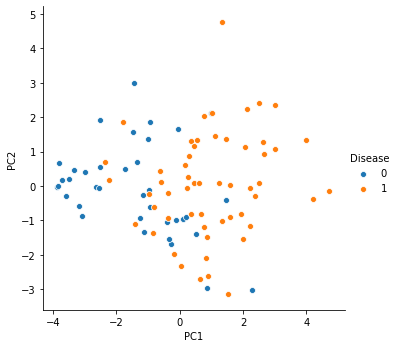

In [490]:
sns.pairplot(data=pc4, x_vars=["PC1"], y_vars=["PC2"], hue = "Disease", size=5)

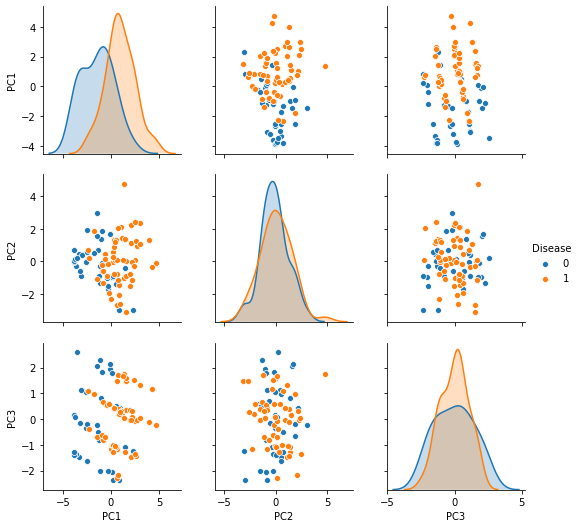

In [491]:
sns.pairplot(pc4,vars=['PC1', 'PC2', 'PC3'], hue ='Disease')
plt.show()

In [492]:
pca.components_

array([[ 0.10483923,  0.33394473,  0.32653058,  0.32893179,  0.39011658,
         0.3478433 ,  0.37726486,  0.420424  ,  0.05302592, -0.22880711,
         0.08084954,  0.03851513,  0.01851393,  0.08290367],
       [ 0.00692133,  0.31903276,  0.400681  ,  0.43890293, -0.26647463,
        -0.3199578 , -0.2320897 , -0.20948704, -0.00117002,  0.0166933 ,
        -0.16927728,  0.14730458, -0.34559984,  0.32215564],
       [-0.07098294, -0.04201885, -0.1279294 ,  0.0025988 , -0.02895046,
        -0.05326464, -0.14902611, -0.08406481,  0.67991199, -0.44888611,
         0.39845957,  0.34672637, -0.03321739,  0.00075982],
       [ 0.63962761, -0.05926935,  0.1411718 ,  0.10140709, -0.16431741,
        -0.07034964, -0.07867765, -0.05265072,  0.09861349,  0.17275352,
         0.40336008, -0.28915632,  0.42399192,  0.22492435],
       [ 0.11361369, -0.01713544, -0.04274123,  0.11908452,  0.3355704 ,
         0.34680255, -0.24674614, -0.26403488,  0.15060047,  0.41869873,
        -0.27302085,  0.50

In [493]:
pca.explained_variance_ratio_

array([0.26885216, 0.14269419, 0.10135298, 0.09955499, 0.07219322,
       0.0704575 , 0.06559912, 0.05183121, 0.03803419, 0.03600381,
       0.02953915, 0.00854947, 0.0083651 , 0.0069729 ])

<BarContainer object of 14 artists>

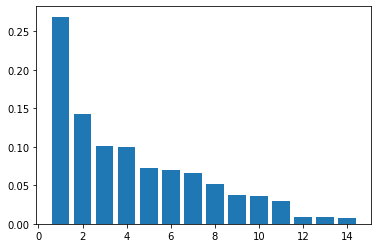

In [494]:
#PCA components 
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

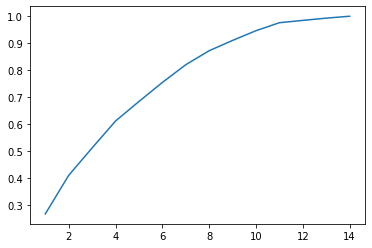

In [495]:
#Cum sum of Variance
#Screeplot Variation of data
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [496]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      26.89
1      41.15
2      51.29
3      61.25
4      68.46
5      75.51
6      82.07
7      87.25
8      91.06
9      94.66
10     97.61
11     98.47
12     99.30
13    100.00
dtype: float64


In [497]:
PCA_VARS =7
pc2 = PCA(n_components=PCA_VARS, random_state=100)
newdata = pc2.fit_transform(X_train)

In [498]:
newdata.shape

(93, 7)

In [499]:
#Class weight = balance is used for imbalanace data
steps = [("pca", PCA(n_components = PCA_VARS)), ("Logistic", LogisticRegression(class_weight= 'balanced'))]
pipeline = Pipeline(steps)

In [500]:
pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train)

0.8172043010752689

In [501]:
y_train_pred= pipeline.predict(X_train)

In [502]:
confusion= confusion_matrix(y_train,y_train_pred)
confusion

array([[29,  9],
       [ 8, 47]], dtype=int64)

In [503]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [504]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8545454545454545

In [505]:
# Let us calculate specificity
TN / float(TN+FP)

0.7631578947368421

In [506]:
#Predicting the test data
y_pred= pipeline.predict(X_test)

In [507]:
confusion= confusion_matrix(y_test,y_pred)
confusion

array([[16,  1],
       [ 4, 20]], dtype=int64)

In [508]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [509]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8333333333333334

In [510]:
# Let us calculate specificity
TN / float(TN+FP)

0.9411764705882353

In [511]:
accuracy= (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8780487804878049

In [512]:
#Hyperparameter 

pca = PCA(random_state=100)

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [6,7,8,9,10,11,12], 'logistic__C': [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.8, 0.9,1,2,3,4,5,6,7,8,9,10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, return_train_score =True, scoring='roc_auc', n_jobs=-1, verbose=1)

In [513]:
# fit model
model.fit(X_train, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed:   29.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=100)),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9,
                                         1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [6, 7, 8, 9, 10, 11, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [514]:
scores = model.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.010306,0.000471,0.0,0.0,0.1,l1,6,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,252,NaN,NaN,NaN,NaN,NaN
1,0.009308,0.000469,0.0,0.0,0.1,l1,7,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,131,NaN,NaN,NaN,NaN,NaN
2,0.008644,0.002050,0.0,0.0,0.1,l1,8,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,142,NaN,NaN,NaN,NaN,NaN
3,0.005981,0.000004,0.0,0.0,0.1,l1,9,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,NaN
4,0.004654,0.001246,0.0,0.0,0.1,l1,10,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,175,NaN,NaN,NaN,NaN,NaN


In [515]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8722072274703853
Best hyperparameters:  {'logistic__C': 0.2, 'logistic__penalty': 'l2', 'pca__n_components': 7}


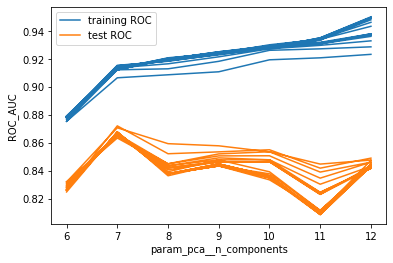

In [516]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_pca__n_components"], 
         scores["mean_train_score"], 
         label="training ROC")
plt.plot(scores["param_pca__n_components"], 
         scores["mean_test_score"], 
         label="test ROC")
plt.xlabel("param_pca__n_components")
plt.ylabel("ROC_AUC")
plt.legend()
plt.show()

In [517]:
y_train_pred= model.predict(X_train)

In [518]:
confusion= confusion_matrix(y_train,y_train_pred)
confusion

array([[31,  7],
       [ 9, 46]], dtype=int64)

In [519]:
print('AUC score for Log_regression after balancing+Parameter :', roc_auc_score(y_train,y_train_pred))

AUC score for Log_regression after balancing+Parameter : 0.8260765550239234


In [520]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [521]:
Accuracy = (46+31)/(31+46+7+9)
Accuracy

0.8279569892473119

In [522]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8363636363636363

In [523]:
# Let us calculate specificity
TN / float(TN+FP)

0.8157894736842105

In [524]:
y_pred = model.predict(X_test)

In [526]:
print('AUC score for Log_regression after balancing+Parameter :', roc_auc_score(y_test,y_pred))

AUC score for Log_regression after balancing+Parameter : 0.8872549019607844


In [527]:
confusion= confusion_matrix(y_test,y_pred)
confusion

array([[16,  1],
       [ 4, 20]], dtype=int64)

In [528]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [529]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8333333333333334

In [530]:
# Let us calculate specificity
TN / float(TN+FP)

0.9411764705882353

In [531]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8780487804878049

## Random Forest

In [763]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 1)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state =100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                    return_train_score =True)
rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(2, 20)}, return_train_score=True,
             scoring='accuracy')

In [764]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.101749,0.005712,0.007301,0.001226,2,{'max_depth': 2},0.677419,0.838710,0.741935,0.752688,0.066284,2,0.870968,0.887097,0.903226,0.887097,0.013169
1,0.098064,0.000457,0.006315,0.000472,3,{'max_depth': 3},0.709677,0.806452,0.741935,0.752688,0.040233,2,0.887097,0.903226,0.935484,0.908602,0.020116
2,0.099734,0.002167,0.007308,0.000475,4,{'max_depth': 4},0.677419,0.806452,0.709677,0.731183,0.054828,18,0.935484,0.967742,0.967742,0.956989,0.015207
3,0.100405,0.000460,0.006309,0.000474,5,{'max_depth': 5},0.709677,0.806452,0.709677,0.741935,0.045620,17,0.951613,1.000000,1.000000,0.983871,0.022810
4,0.109703,0.008613,0.007635,0.000925,6,{'max_depth': 6},0.774194,0.806452,0.709677,0.763441,0.040233,1,0.967742,1.000000,1.000000,0.989247,0.015207


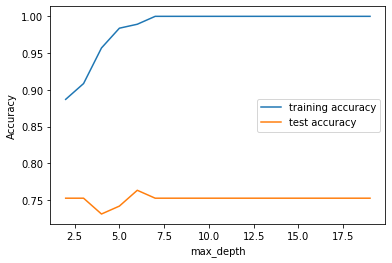

In [765]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [769]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(2,40, 2)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=6, class_weight= 'balanced', random_state =100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                   return_train_score =True)
rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=6, random_state=100),
             param_grid={'n_estimators': range(2, 40, 2)},
             return_train_score=True, scoring='accuracy')

In [770]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.006648,1.693892e-03,0.002659,0.000470,2,{'n_estimators': 2},0.612903,0.677419,0.645161,0.645161,0.026339,19,0.903226,0.903226,0.903226,0.903226,0.000000
1,0.007959,8.396222e-04,0.002031,0.000026,4,{'n_estimators': 4},0.774194,0.709677,0.677419,0.720430,0.040233,17,0.919355,0.935484,0.983871,0.946237,0.027414
2,0.009654,1.689041e-03,0.002671,0.000480,6,{'n_estimators': 6},0.774194,0.774194,0.741935,0.763441,0.015207,3,0.967742,0.903226,1.000000,0.956989,0.040233
3,0.010644,4.612555e-04,0.002325,0.000468,8,{'n_estimators': 8},0.741935,0.709677,0.741935,0.731183,0.015207,13,0.967742,0.935484,0.983871,0.962366,0.020116
4,0.011968,7.370010e-07,0.002330,0.000469,10,{'n_estimators': 10},0.709677,0.677419,0.774194,0.720430,0.040233,17,0.967742,0.983871,0.983871,0.978495,0.007603


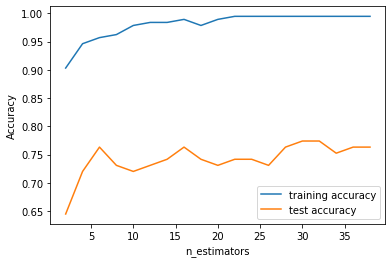

In [771]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [773]:
#Maximum Features
# specify number of folds for k-fold CV
n_folds =3

# parameters to build the model on
parameters = {'max_features': [2,3,4,5,6,7,8,9,10,11,12]}

# instantiate the model
rf = RandomForestClassifier(max_depth=6, class_weight= 'balanced', random_state =100, n_estimators = 20)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score =True)
rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=6, n_estimators=20,
                                              random_state=100),
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             return_train_score=True, scoring='accuracy')

In [774]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.023610,1.244429e-03,0.002996,0.000007,2,{'max_features': 2},0.709677,0.774194,0.741935,0.741935,0.026339,7,0.967742,0.983871,0.983871,0.978495,0.007603
1,0.024608,2.617148e-03,0.002659,0.000470,3,{'max_features': 3},0.709677,0.774194,0.709677,0.731183,0.030413,9,0.983871,1.000000,0.983871,0.989247,0.007603
2,0.021932,1.850575e-05,0.002987,0.000028,4,{'max_features': 4},0.774194,0.741935,0.741935,0.752688,0.015207,5,0.967742,1.000000,1.000000,0.989247,0.015207
3,0.021940,8.920806e-07,0.002661,0.000470,5,{'max_features': 5},0.774194,0.806452,0.741935,0.774194,0.026339,1,0.983871,1.000000,0.983871,0.989247,0.007603
4,0.022605,4.711470e-04,0.002659,0.000469,6,{'max_features': 6},0.774194,0.774194,0.709677,0.752688,0.030413,5,1.000000,1.000000,0.983871,0.994624,0.007603


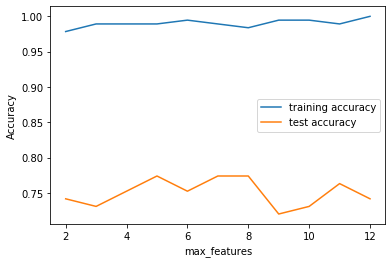

In [775]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [776]:
## GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 20, 1)}

# instantiate the model
rf = RandomForestClassifier(max_depth=6, class_weight= 'balanced', random_state =100, n_estimators = 20,max_features =8 )


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score =True)
rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=6, max_features=8,
                                              n_estimators=20,
                                              random_state=100),
             param_grid={'min_samples_leaf': range(1, 20)},
             return_train_score=True, scoring='accuracy')

In [777]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.025939,0.003561,0.003664,0.000950,1,{'min_samples_leaf': 1},0.806452,0.806452,0.709677,0.774194,4.561979e-02,1,0.983871,0.983871,0.983871,0.983871,0.000000
1,0.023948,0.001431,0.002327,0.000471,2,{'min_samples_leaf': 2},0.774194,0.741935,0.709677,0.741935,2.633860e-02,2,0.919355,0.967742,0.951613,0.946237,0.020116
2,0.021939,0.000815,0.002323,0.000474,3,{'min_samples_leaf': 3},0.774194,0.677419,0.709677,0.720430,4.023288e-02,3,0.919355,0.935484,0.903226,0.919355,0.013169
3,0.021609,0.000471,0.002662,0.000470,4,{'min_samples_leaf': 4},0.709677,0.709677,0.709677,0.709677,1.110223e-16,5,0.887097,0.903226,0.870968,0.887097,0.013169
4,0.021609,0.000470,0.002658,0.000471,5,{'min_samples_leaf': 5},0.709677,0.709677,0.741935,0.720430,1.520660e-02,3,0.870968,0.870968,0.870968,0.870968,0.000000


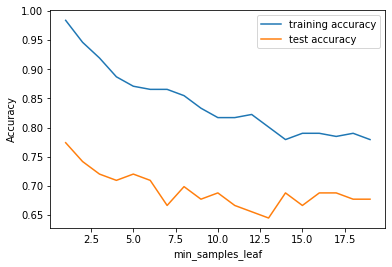

In [778]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [779]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(2, 30, 2)}

# instantiate the model
rf = RandomForestClassifier(max_depth=6, class_weight= 'balanced', random_state =100, n_estimators = 20,max_features =8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",  return_train_score =True)
rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=6, max_features=8,
                                              n_estimators=20,
                                              random_state=100),
             param_grid={'min_samples_split': range(2, 30, 2)},
             return_train_score=True, scoring='accuracy')

In [780]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.024609,0.001253,0.003315,4.582209e-04,2,{'min_samples_split': 2},0.806452,0.806452,0.709677,0.774194,0.045620,3,0.983871,0.983871,0.983871,0.983871,0.000000
1,0.023938,0.001408,0.002666,4.751496e-04,4,{'min_samples_split': 4},0.774194,0.741935,0.709677,0.741935,0.026339,8,0.951613,0.967742,0.951613,0.956989,0.007603
2,0.021616,0.000463,0.002994,1.486801e-06,6,{'min_samples_split': 6},0.741935,0.774194,0.709677,0.741935,0.026339,8,0.935484,0.951613,0.951613,0.946237,0.007603
3,0.021612,0.000471,0.002987,2.973602e-07,8,{'min_samples_split': 8},0.806452,0.774194,0.741935,0.774194,0.026339,3,0.903226,0.919355,0.919355,0.913978,0.007603
4,0.021941,0.000815,0.002645,4.599105e-04,10,{'min_samples_split': 10},0.806452,0.774194,0.774194,0.784946,0.015207,1,0.887097,0.870968,0.919355,0.892473,0.020116


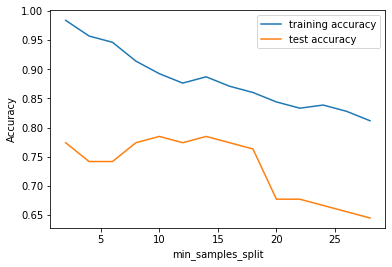

In [781]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,5,6,7,8,9,10,12,14],
    'min_samples_leaf': range(3,9,1),
    'min_samples_split': range(8,20,2),
    'n_estimators': [10,15,20,30,40,50,60,80], 
    'max_features': [4,6,8,10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
max_depth=6, class_weight= 'balanced', random_state =100, n_estimators = 20,max_features =8

In [871]:
# model with the best hyperparameters
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight= 'balanced', bootstrap=True,
                             max_depth=3,
                             min_samples_leaf=5, 
                             min_samples_split=6,
                             max_features= 6,
                             n_estimators=30, random_state =100)

In [872]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=6,
                       min_samples_leaf=5, min_samples_split=6, n_estimators=30,
                       random_state=100)

In [873]:
y_train_pred= rfc.predict(X_train)

In [886]:
print('AUC score for Log_regression after balancing+Parameter :', roc_auc_score(y_train,y_train_pred))

AUC score for Log_regression after balancing+Parameter : 0.8574162679425836


In [874]:
confusion= confusion_matrix(y_train,y_train_pred)
confusion

array([[32,  6],
       [ 7, 48]], dtype=int64)

In [875]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [876]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8727272727272727

In [877]:
# Let us calculate specificity
TN / float(TN+FP)

0.8421052631578947

In [878]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8602150537634409

In [888]:
# predict test data 
predictions = rfc.predict(X_test)

In [889]:
print('AUC score for Log_regression after balancing+Parameter :', roc_auc_score(y_test,predictions))

AUC score for Log_regression after balancing+Parameter : 0.857843137254902


In [890]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.91      0.83      0.87        24

    accuracy                           0.85        41
   macro avg       0.85      0.86      0.85        41
weighted avg       0.86      0.85      0.85        41



In [891]:
confusion = (confusion_matrix(y_test,predictions))
print (confusion)

[[15  2]
 [ 4 20]]


In [892]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [893]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8333333333333334

In [894]:
# Let us calculate specificity
TN / float(TN+FP)

0.8823529411764706

In [895]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8536585365853658

In [885]:
# Let's check the overall accuracy.
from sklearn import metrics
# Let's check the overall accuracy.
metrics.accuracy_score(y_test,predictions)

0.8536585365853658

In [856]:
feature_importance = pd.concat([pd.DataFrame(X.columns, columns = ['variable']),
           pd.DataFrame(rfc.feature_importances_, columns = ['importance'])],
          axis = 1).sort_values(by = 'importance', ascending = False)
feature_importance 

,variable,importance
4,CD44%>4,0.231661
2,SNA1MAX,0.161214
1,SNA1%,0.152994
5,CD44N%,0.105315
3,SNA1MEAN,0.095017
6,CD44N+,0.079144
7,CD44max,0.070687
0,age,0.064733
9,Habit _No_Habits,0.024855
8,Sex_M,0.013975


# SVM

In [896]:
model = SVC(C = 1, class_weight= 'balanced', random_state =100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [897]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[14,  3],
       [ 7, 17]], dtype=int64)

In [898]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.7560975609756098
precision 0.85
recall 0.7083333333333334


In [899]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 4, shuffle = True, random_state = 100)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel='rbf', class_weight= 'balanced', random_state =100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=SVC(class_weight='balanced', random_state=100),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [900]:
help(SVC)


Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

In [901]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.002989,7.132158e-04,0.001741,4.282694e-04,1,0.01,"{'C': 1, 'gamma': 0.01}",0.791667,0.695652,0.913043,0.782609,0.795743,0.077406,2,0.869565,0.842857,0.800000,0.842857,0.838820,0.024924
1,0.002736,4.428579e-04,0.002023,1.440707e-05,1,0.001,"{'C': 1, 'gamma': 0.001}",0.708333,0.739130,0.739130,0.652174,0.709692,0.035509,10,0.753623,0.800000,0.714286,0.757143,0.756263,0.030343
2,0.002749,4.355195e-04,0.001491,4.918036e-04,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.666667,0.521739,0.565217,0.608696,0.590580,0.053618,12,0.565217,0.614286,0.600000,0.585714,0.591304,0.018135
3,0.003740,8.271018e-04,0.001738,4.285547e-04,10,0.01,"{'C': 10, 'gamma': 0.01}",0.833333,0.782609,0.913043,0.739130,0.817029,0.064687,1,0.884058,0.900000,0.857143,0.900000,0.885300,0.017511
4,0.001995,1.032383e-07,0.001745,4.318457e-04,10,0.001,"{'C': 10, 'gamma': 0.001}",0.791667,0.739130,0.869565,0.695652,0.774004,0.064806,4,0.811594,0.828571,0.785714,0.814286,0.810041,0.015456
5,0.002992,5.161914e-07,0.000997,2.920019e-07,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.750000,0.652174,0.782609,0.695652,0.720109,0.050032,9,0.739130,0.700000,0.714286,0.757143,0.727640,0.022050
6,0.002494,5.002051e-04,0.001495,4.997288e-04,100,0.01,"{'C': 100, 'gamma': 0.01}",0.625000,0.739130,0.913043,0.739130,0.754076,0.102930,7,0.956522,0.942857,0.928571,0.928571,0.939130,0.011612
7,0.002738,4.287100e-04,0.001002,6.718953e-06,100,0.001,"{'C': 100, 'gamma': 0.001}",0.833333,0.782609,0.869565,0.652174,0.784420,0.082363,3,0.840580,0.900000,0.842857,0.871429,0.863716,0.024220
8,0.002742,4.316405e-04,0.001984,1.704516e-05,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.791667,0.739130,0.826087,0.695652,0.763134,0.049767,6,0.826087,0.828571,0.771429,0.814286,0.810093,0.022966
9,0.003252,8.373275e-04,0.002244,4.323964e-04,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.625000,0.652174,0.782609,0.695652,0.688859,0.059705,11,0.985507,0.985714,1.000000,1.000000,0.992805,0.007195


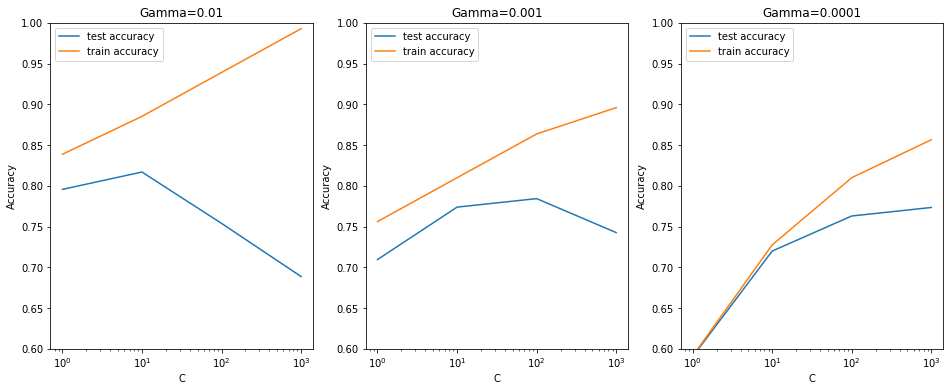

In [902]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [903]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8170289855072463 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [1075]:
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.001, "kernel":"rbf"}

# model
model = SVC(C=10, gamma=0.01, kernel='rbf', class_weight= 'balanced', random_state =100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("recall", metrics.recall_score(y_test, y_pred))

[[14  3]
 [ 6 18]] 

accuracy 0.7804878048780488
Precision 0.8571428571428571
recall 0.75


In [1076]:
y_train_pred= model.predict(X_train)

In [1077]:
print('AUC score for Log_regression after balancing+Parameter :', roc_auc_score(y_train,y_train_pred))

AUC score for Log_regression after balancing+Parameter : 0.8665071770334927


In [1078]:
confusion= confusion_matrix(y_train,y_train_pred)
confusion

array([[32,  6],
       [ 6, 49]], dtype=int64)

In [1079]:
metrics.accuracy_score(y_train,y_train_pred)

0.8709677419354839

In [1080]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1081]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8909090909090909

In [1082]:
# Let us calculate specificity
TN / float(TN+FP)

0.8421052631578947

In [1083]:
confusion  =(metrics.confusion_matrix(y_test, y_pred))
confusion

array([[14,  3],
       [ 6, 18]], dtype=int64)

In [1084]:
print('AUC score for Log_regression after balancing+Parameter :', roc_auc_score(y_test,y_pred))

AUC score for Log_regression after balancing+Parameter : 0.7867647058823529


In [1085]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1086]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.75

In [1087]:
# Let us calculate specificity
TN / float(TN+FP)

0.8235294117647058

In [1088]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test,y_pred)

0.7804878048780488

# Log regression 

In [1122]:
# Class weight balance is used for imbalance data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight= 'balanced', random_state =100)

In [1123]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 8)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [1124]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', True, 1),
 ('SNA1%', False, 7),
 ('SNA1MAX', True, 1),
 ('SNA1MEAN', False, 3),
 ('CD44%>4 ', True, 1),
 ('CD44N%', True, 1),
 ('CD44N+', True, 1),
 ('CD44max', True, 1),
 ('Sex_M', False, 2),
 ('Habit _No_Habits', True, 1),
 ('Habit _smoking ', True, 1),
 ('Habit _smoking+Chewing ', False, 4),
 ('Site _Other', False, 6),
 ('Site _Tongue', False, 5)]

In [1125]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['SNA1%', 'SNA1MEAN', 'Sex_M', 'Habit _smoking+Chewing ', 'Site _Other',
       'Site _Tongue'],
      dtype='object')

In [1168]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Disease   No. Observations:                   93
Model:                            GLM   Df Residuals:                       86
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.064
Date:                Mon, 21 Dec 2020   Deviance:                       64.128
Time:                        13:45:16   Pearson chi2:                     66.7
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6537      0.358      1.824      0.068      -0.049       1.356
SNA1MAX              1.4668      0.466      3.150      0.002       0.554       2.379
CD44%>4              2.2969      1.156      1.987      0.047       0.032       4.562
CD44N%              -2.4449      1.092     -2.238      0.025      -4.586      -0.304
CD44N+               1.1578      0.574      2.016      0.044       0.032       2.284
CD44max              0.4341      0.666      0.652      0.514      -0.871       1.739
Habit _No_Habits    -0.5192      0.367     -1.416      0.157      -1.238       0.200
====================================================================================
"""

In [1127]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CD44max,4.83
2,CD44%>4,4.49
3,CD44N%,3.99
4,CD44N+,3.91
6,Habit _No_Habits,1.28
7,Habit _smoking,1.21
1,SNA1MAX,1.17
0,age,1.11


In [1204]:
col

Index(['SNA1MAX', 'CD44%>4 ', 'CD44N%', 'CD44N+', 'CD44max',
       'Habit _No_Habits'],
      dtype='object')

In [1205]:
#removing High VIF Variable
col = col.drop('CD44max', 1)
col

Index(['SNA1MAX', 'CD44%>4 ', 'CD44N%', 'CD44N+', 'Habit _No_Habits'], dtype='object')

In [1206]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,CD44%>4,4.16
2,CD44N%,3.72
3,CD44N+,1.50
4,Habit _No_Habits,1.13
0,SNA1MAX,1.10


In [267]:
#removing High VIF Variable
col = col.drop('SNA1%', 1)
col

Index(['age', 'SNA1MAX', 'CD44%>4 ', 'CD44N+', 'Habit _No_Habits'], dtype='object')

In [1118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,CD44%>4,4.10
2,CD44N%,3.68
3,CD44N+,1.46
0,SNA1MAX,1.08


In [1167]:
col = col.drop('Habit _smoking ', 1)
col

Index(['SNA1MAX', 'CD44%>4 ', 'CD44N%', 'CD44N+', 'CD44max',
       'Habit _No_Habits'],
      dtype='object')

In [273]:
col = col.drop('age', 1)
col

Index(['SNA1MAX', 'CD44%>4 ', 'CD44N+', 'Habit _No_Habits'], dtype='object')

In [313]:
col = col.drop('CD44%>4 ', 1)
col

Index(['SNA1MAX', 'CD44N+', 'Habit _No_Habits'], dtype='object')

In [765]:
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1113]:
col

Index(['SNA1MAX', 'CD44%>4 ', 'CD44N%', 'CD44N+', 'Habit _No_Habits'], dtype='object')

In [766]:
y_pred = logreg.predict(X_test[col])

In [1294]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit(random_state =100)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Disease   No. Observations:                   93
Model:                            GLM   Df Residuals:                       87
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.279
Date:                Mon, 21 Dec 2020   Deviance:                       64.558
Time:                        13:51:26   Pearson chi2:                     69.1
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6712      0.354      1.896      0.058      -0.023       1.365
SNA1MAX              1.4546      0.456      3.188      0.001       0.560       2.349
CD44%>4              2.4143      1.141      2.116      0.034       0.178       4.650
CD44N%              -2.4669      1.087     -2.270      0.023      -4.597      -0.337
CD44N+               1.4306      0.415      3.444      0.001       0.616       2.245
Habit _No_Habits    -0.5502      0.357     -1.542      0.123      -1.249       0.149
====================================================================================
"""

In [1295]:
print ('Accuracy {}'.format (metrics.accuracy_score(y_test, y_pred)))
print ('sensitivity {}'.format (metrics.recall_score(y_test, y_pred)))

Accuracy 0.7804878048780488
sensitivity 0.75


In [1296]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

19     0.856367
4      0.731420
24     0.618133
76     0.987374
55     0.623870
38     0.993181
37     0.991220
105    0.015835
54     0.990236
44     0.908596
dtype: float64

In [1297]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85636741, 0.73142031, 0.6181334 , 0.98737372, 0.62387042,
       0.99318062, 0.9912203 , 0.01583478, 0.99023583, 0.90859574])

In [1298]:
y_train_pred_final = pd.DataFrame({'Disease':y_train.values, 'Disease_Prob':y_train_pred})
y_train_pred_final['StudyID'] = y_train.index
y_train_pred_final.head()

,Disease,Disease_Prob,StudyID
0,1,0.856367,19
1,1,0.731420,4
2,1,0.618133,24
3,1,0.987374,76
4,1,0.623870,55


In [1299]:
y_train_pred_final['predicted'] = y_train_pred_final.Disease_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Disease,Disease_Prob,StudyID,predicted
0,1,0.856367,19,1
1,1,0.731420,4,1
2,1,0.618133,24,1
3,1,0.987374,76,1
4,1,0.623870,55,1


In [1300]:
# Let's check the overall accuracy of train data
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Disease, y_train_pred_final.predicted))

0.8387096774193549


In [1301]:
confusion = metrics.confusion_matrix(y_train_pred_final.Disease, y_train_pred_final.predicted )
confusion

array([[28, 10],
       [ 5, 50]], dtype=int64)

In [1302]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1303]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9090909090909091

In [1304]:
# Let us calculate specificity
TN / float(TN+FP)

0.7368421052631579

In [1305]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1306]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Disease, y_train_pred_final.Disease_Prob, drop_intermediate = False )

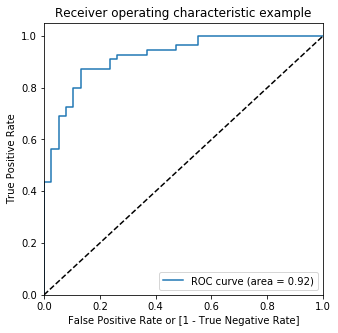

In [1307]:
draw_roc(y_train_pred_final.Disease, y_train_pred_final.Disease_Prob)

In [1308]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Disease_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Disease,Disease_Prob,StudyID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.856367,19,1,1,1,1,1,1,1,1,1,1,0
1,1,0.731420,4,1,1,1,1,1,1,1,1,1,0,0
2,1,0.618133,24,1,1,1,1,1,1,1,1,0,0,0
3,1,0.987374,76,1,1,1,1,1,1,1,1,1,1,1
4,1,0.623870,55,1,1,1,1,1,1,1,1,0,0,0


In [1309]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Disease, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

<Figure size 288x432 with 0 Axes>

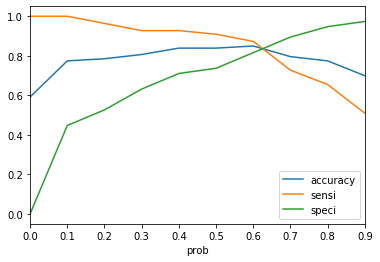

In [1310]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize =(4,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1379]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Disease_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

,Disease,Disease_Prob,StudyID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.856367,19,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.731420,4,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.618133,24,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.987374,76,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.623870,55,1,1,1,1,1,1,1,1,0,0,0,1


In [1380]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Disease, y_train_pred_final.final_predicted)

0.8494623655913979

In [1392]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Disease, y_train_pred_final.final_predicted )
confusion2

array([[28, 10],
       [ 4, 51]], dtype=int64)

In [1393]:
print('AUC score for Log_regression after balancing+Parameter :', roc_auc_score(y_train,y_train_pred))

AUC score for Log_regression after balancing+Parameter : 0.9210526315789473


In [1394]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1395]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9272727272727272

In [1396]:
# Let us calculate specificity
TN / float(TN+FP)

0.7368421052631579

In [1361]:
X_test_sm =sm.add_constant(X_test[col])

In [1362]:
y_test_pred = res.predict(X_test_sm)

In [1363]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['StudyID'] = y_test_df.index

In [1364]:
y_pred_1.reset_index(drop =True, inplace = True)
y_test_df.reset_index (drop =True, inplace= True)
y_pre_final = pd.concat([y_test_df, y_pred_1], axis =1)
y_pred_final = y_pre_final.rename (columns= {0:'Disease_Prob'})

In [1372]:
y_pred_final ['final_predicted']= y_pred_final.Disease_Prob.map(lambda x: 1if x> 0.45 else 0)

In [1373]:
y_pred_final.head(5)

,Disease,StudyID,Disease_Prob,final_predicted
0,1,30,0.823278,1
1,0,94,0.835333,1
2,1,12,0.840809,1
3,1,42,0.789117,1
4,1,50,0.737358,1


In [1397]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Disease, y_pred_final.final_predicted)

0.8780487804878049

In [1398]:
confusion2 = metrics.confusion_matrix(y_pred_final.Disease, y_pred_final.final_predicted )
confusion2

array([[15,  2],
       [ 3, 21]], dtype=int64)

In [1399]:
print('AUC score for Log_regression after balancing+Parameter :', roc_auc_score(y_test,y_test_pred))

AUC score for Log_regression after balancing+Parameter : 0.8848039215686274


In [1400]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1401]:
# Let's see the sensitivity of our logistic regression model
Recall = TP / float(TP+FN)
Recall

0.875

In [1402]:
# Let us calculate specificity
TN / float(TN+FP)

0.8823529411764706

In [1403]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8780487804878049

In [1342]:
# Checking Pseudo R2 of train data 
logit_model=sm.Logit(list(y_train),X_train[col])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.367972
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   93
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                  0.4559
Time:                        13:52:41   Log-Likelihood:                -34.221
converged:                       True   LL-Null:                       -62.900
Covariance Type:            nonrobust   LLR p-value:                 1.041e-11
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
SNA1MAX              1.2847      0.408      3.151      0.002       0.486       2.084
CD44%>4    

In [1385]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=5)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.48148148 0.59259259 0.73076923 0.74074074 0.96296296]
0.7017094017094017


In [1386]:
#step-1: create cross vaidation scheme 
folds = KFold(n_splits =3, shuffle = True, random_state =100)

#step2: specify the range of hyperparmeters to tune 
hyper_params = [{'n_features_to_select':list(range(1,14))}]

#step3 perform grid search 
#3.1 specify model
lm= LogisticRegression()
lm.fit(X_train, y_train)
rfe= RFE(lm)


#3.2 call grid search 
model_cv = GridSearchCV (estimator = rfe,
                        param_grid = hyper_params,
                         scoring= 'accuracy', 
                        cv= folds, 
                        verbose =1,
                        return_train_score = True)
#fit the model
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [806]:
# cv results
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.033907,1.648974e-03,0.001316,4.500160e-04,1,{'n_features_to_select': 1},0.741935,0.774194,0.838710,0.784946,4.023288e-02,2,0.806452,0.790323,0.741935,0.779570,0.027414
1,0.028258,4.700779e-04,0.000997,1.946680e-07,2,{'n_features_to_select': 2},0.709677,0.774194,0.838710,0.774194,5.267720e-02,5,0.758065,0.806452,0.725806,0.763441,0.033142
2,0.031914,2.154940e-03,0.001330,4.701903e-04,3,{'n_features_to_select': 3},0.741935,0.741935,0.838710,0.774194,4.561979e-02,5,0.822581,0.854839,0.758065,0.811828,0.040233
3,0.025598,4.701903e-04,0.000997,0.000000e+00,4,{'n_features_to_select': 4},0.741935,0.741935,0.677419,0.720430,3.041319e-02,13,0.806452,0.854839,0.790323,0.817204,0.027414
4,0.023603,4.701903e-04,0.000997,1.123916e-07,5,{'n_features_to_select': 5},0.741935,0.741935,0.709677,0.731183,1.520660e-02,12,0.806452,0.870968,0.822581,0.833333,0.027414
5,0.021941,8.143934e-04,0.000998,0.000000e+00,6,{'n_features_to_select': 6},0.741935,0.774194,0.741935,0.752688,1.520660e-02,11,0.806452,0.870968,0.838710,0.838710,0.026339
6,0.020279,4.702464e-04,0.000997,1.123916e-07,7,{'n_features_to_select': 7},0.774194,0.774194,0.774194,0.774194,1.110223e-16,7,0.822581,0.870968,0.838710,0.844086,0.020116
7,0.018284,4.702464e-04,0.000665,4.701903e-04,8,{'n_features_to_select': 8},0.774194,0.774194,0.741935,0.763441,1.520660e-02,9,0.822581,0.887097,0.854839,0.854839,0.026339
8,0.015957,1.123916e-07,0.000997,0.000000e+00,9,{'n_features_to_select': 9},0.806452,0.774194,0.709677,0.763441,4.023288e-02,9,0.806452,0.887097,0.870968,0.854839,0.034843
9,0.013630,4.701340e-04,0.000665,4.702464e-04,10,{'n_features_to_select': 10},0.838710,0.774194,0.709677,0.774194,5.267720e-02,7,0.822581,0.887097,0.870968,0.860215,0.027414


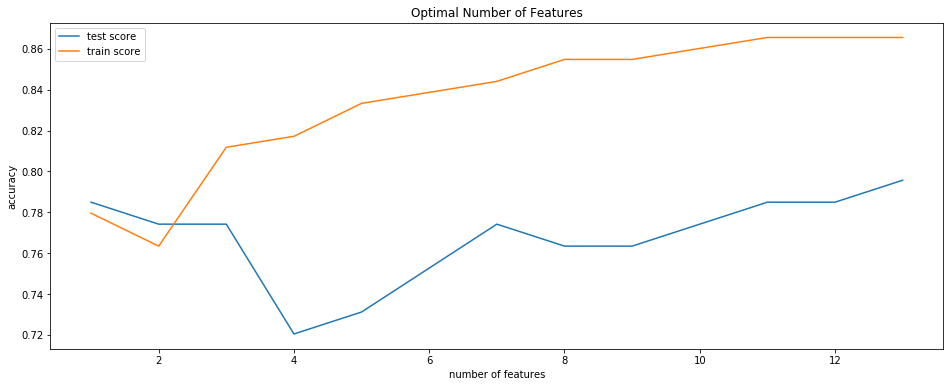

In [911]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [28]:
#KNN

In [1405]:
from sklearn.neighbors import KNeighborsClassifier

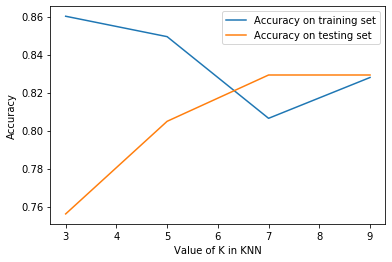

In [1423]:
k_range = range(3, 10, 2)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [1473]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
print('Accuracy of KNN n=6 on the testing dataset is :{:.3f}'.format(knn.score(X_test,y_test)))

Accuracy of KNN n=6 on the testing dataset is :0.829


In [1474]:
predict= knn.predict(X_test)

In [1475]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.87      0.83      0.85        24

    accuracy                           0.83        41
   macro avg       0.82      0.83      0.83        41
weighted avg       0.83      0.83      0.83        41



In [1476]:
y_train_predict= knn.predict(X_train)

In [1477]:
print('AUC score for Svm after parameter tuning :', roc_auc_score(y_train, y_train_predict))

AUC score for Svm after parameter tuning : 0.8624401913875599


In [1478]:
confusion  =(metrics.confusion_matrix(y_train, y_train_predict))
confusion

array([[31,  7],
       [ 5, 50]], dtype=int64)

In [1479]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1480]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9090909090909091

In [1481]:
# Let us calculate specificity
TN / float(TN+FP)

0.8157894736842105

In [1482]:
confusion  =(metrics.confusion_matrix(y_test, predict))
confusion

array([[14,  3],
       [ 4, 20]], dtype=int64)

In [1483]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1484]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8333333333333334

In [1485]:
# Let us calculate specificity
TN / float(TN+FP)

0.8235294117647058

In [1486]:
print('AUC score for Svm after parameter tuning :', roc_auc_score(y_test, predict))

AUC score for Svm after parameter tuning : 0.8284313725490196


In [1487]:
from xgboost import XGBClassifier

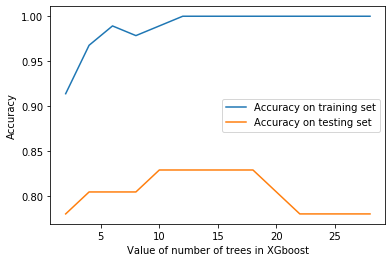

In [1488]:
tree_range = range(2, 30, 2)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [1489]:
#These variable were tuned in Google colab and selected best Hyperparameter
xgb_param = {'n_estimators':[2,4,6,8,10,12,14,16,18,20],            # no. of iteation or tree
             'learning_rate':[0.01, 0.020,0.030,0.040],        # learning rate 
             'max_depth':[3,4,5,6],                   # max depth of a tree
             'min_child_weight':[1,2,3,4],            # minimum sum of weights of all observations
             'gamma':[0.1,0.2,0.3],                   # minimum loss reduction required 
             'colsample_bytree':[0.2,0.3,0.5],        # fraction of random columns  
             'booster':['gbtree'],                    # gbtree: tree-based model
             'objective':['binary:logistic']}         # binary classification prblm

In [174]:
xgb_cfl =XGBClassifier(n_jobs = -1)
CV_xgb_cfl = GridSearchCV (estimator = xgb_cfl, param_grid = xgb_param,scoring='roc_auc', n_jobs=-1, verbose=1)

CV_xgb_cfl.fit(X_train, y_train)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 3718 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 7918 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 13318 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 19918 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 27718 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 28800 out of 28800 | elapsed:  1.5min finished


The best parameters for using this model is {'booster': 'gbtree', 'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 20, 'objective': 'binary:logistic'}


In [1490]:
xgb = XGBClassifier(n_estimators=20,
                        max_depth=3,
                        learning_rate=0.001,
                        colsample_bytree=0.5,
                        gamma=0.2,
                        min_child_weight=2,
                        objective='binary:logistic',
                        n_jobs=-1,
                        booster='gbtree')

In [1491]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1492]:
xgb_bst_proba = xgb.predict_proba(X_test)[:,1]

In [1493]:
from sklearn.metrics import roc_auc_score,roc_curve

In [1494]:
xgb_fpr, xgb_tpr, xgb_thrs = roc_curve(y_test,xgb_bst_proba)

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC) ')

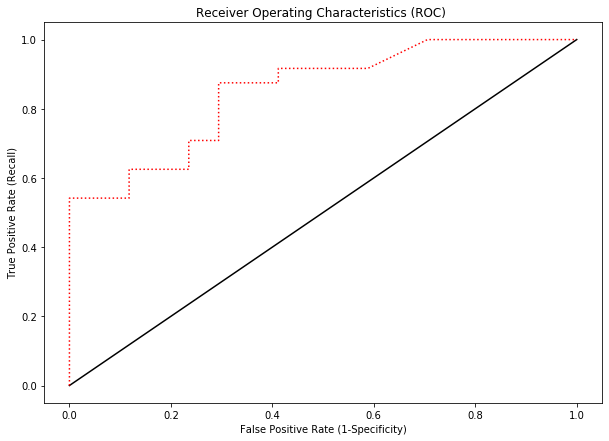

In [1495]:
# plotting ROC
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(xgb_fpr,xgb_tpr,':', color='red')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC) ')

In [1496]:
print('AUC score for XGboost after parameter tuning :', roc_auc_score(y_test,xgb_bst_proba))

AUC score for XGboost after parameter tuning : 0.8504901960784313


In [1505]:
print('AUC score for XGboost after parameter tuning :', roc_auc_score(y_train,xgb_train_pred))

AUC score for XGboost after parameter tuning : 0.8452153110047846


In [1497]:
xgb_train_pred= xgb.predict(X_train)

In [1498]:
confusion  =(metrics.confusion_matrix(y_train,xgb_train_pred))
confusion

array([[29,  9],
       [ 4, 51]], dtype=int64)

In [1499]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1500]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9272727272727272

In [1501]:
# Let us calculate specificity
TN / float(TN+FP)

0.7631578947368421

In [1502]:
#Recall and precision 
recall = TP / float(TP+FN)
precision = TP/(TP+FP)
print(recall)
print(precision)

0.9272727272727272
0.85


In [1503]:
xgb_pre = xgb.predict(X_test)

In [1506]:
confusion  =(metrics.confusion_matrix(y_test,xgb_pre))
confusion

array([[12,  5],
       [ 3, 21]], dtype=int64)

In [1507]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1508]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.875

In [1509]:
# Let us calculate specificity
TN / float(TN+FP)

0.7058823529411765

In [1510]:
#Recall and precision 
recall = TP / float(TP+FN)
precision = TP/(TP+FP)
print(recall)
print(precision)

0.875
0.8076923076923077
